In [9]:
import pandas as pd
df=pd.read_csv('car data.csv')

In [10]:
from pandas import get_dummies

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [13]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [14]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
final_dataset['Current_year']=2022

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [20]:
final_dataset['No_years']=final_dataset['Current_year']-final_dataset['Year']

In [21]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [22]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [23]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [24]:
final_dataset=pd.get_dummies(final_dataset, columns=['Fuel_Type', 'Seller_Type', 'Transmission'],drop_first=True)

In [25]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2022,8,0,1,0,1
1,4.75,9.54,43000,0,2022,9,1,0,0,1
2,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2.85,4.15,5200,0,2022,11,0,1,0,1
4,4.60,6.87,42450,0,2022,8,1,0,0,1


In [26]:
#correlation 
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_years,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [27]:
import seaborn as sns

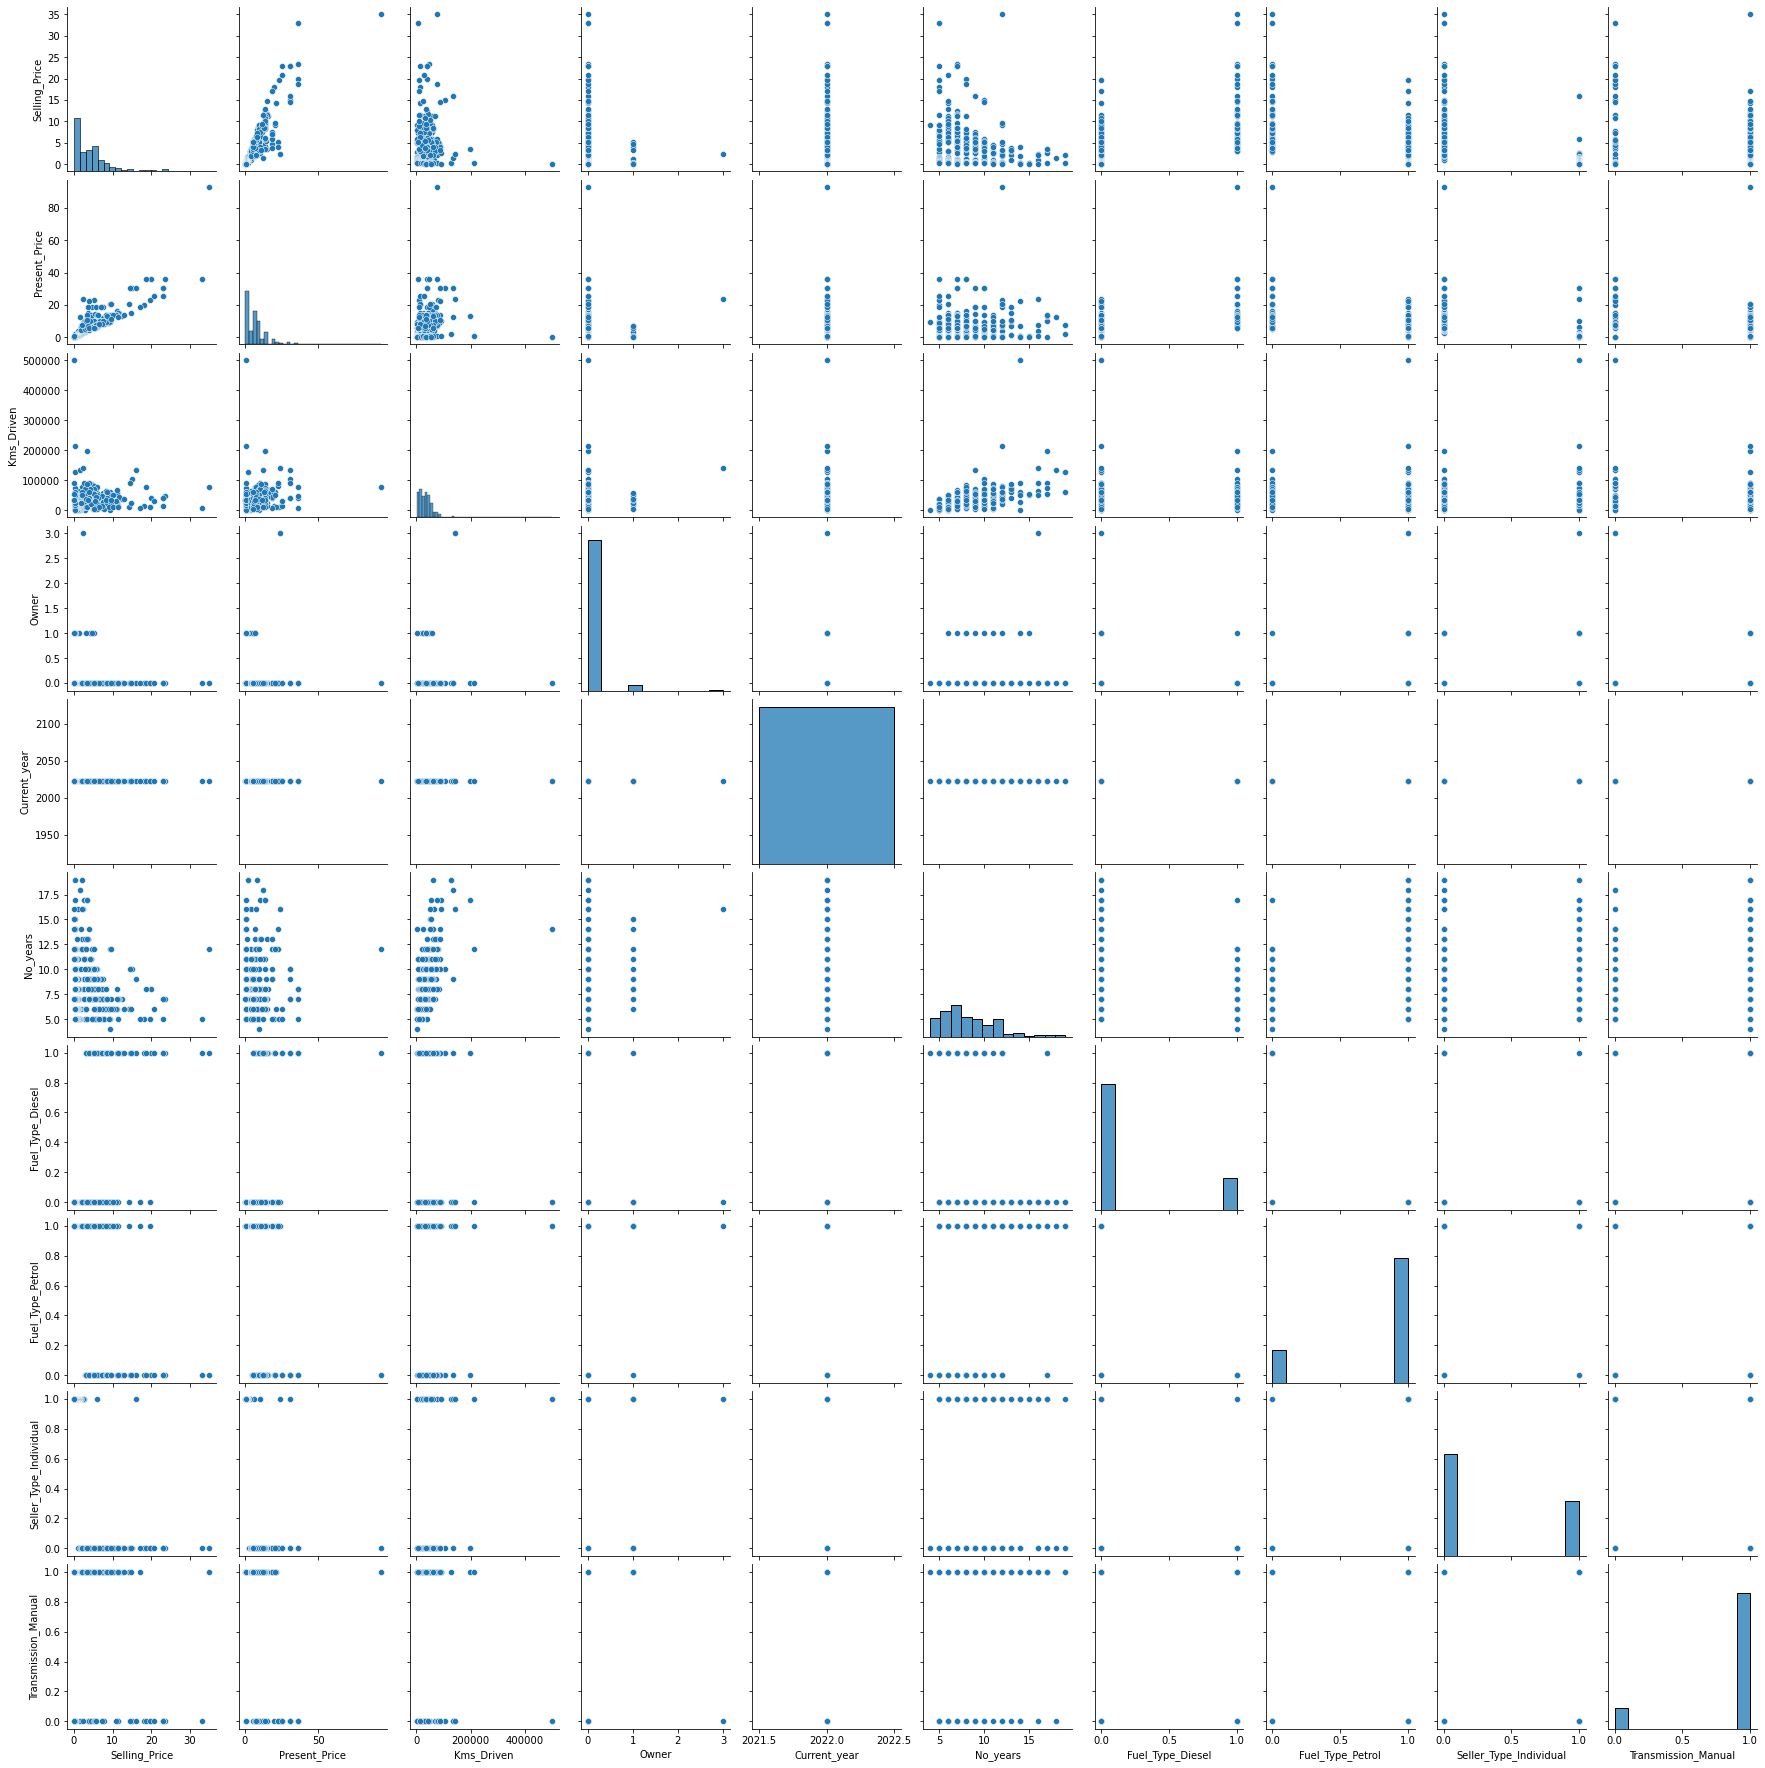

In [28]:
sns.pairplot(final_dataset)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

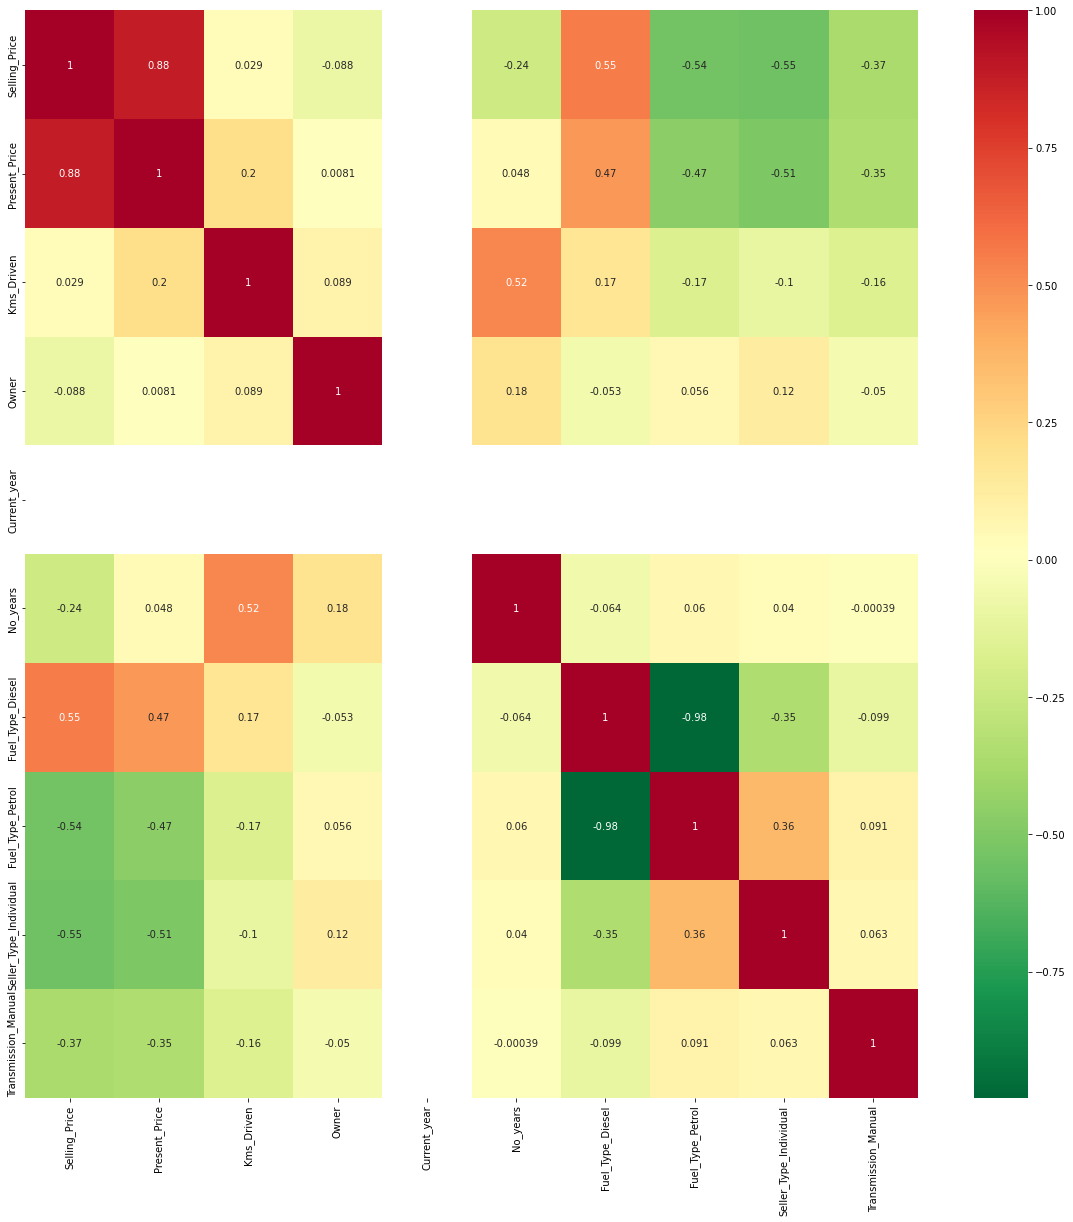

In [30]:
corrmat=final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map 
_g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn_r')

In [31]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2022,8,0,1,0,1
1,4.75,9.54,43000,0,2022,9,1,0,0,1
2,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2.85,4.15,5200,0,2022,11,0,1,0,1
4,4.60,6.87,42450,0,2022,8,1,0,0,1


In [32]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [33]:
X.head()

,Present_Price,Kms_Driven,Owner,Current_year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,2022,8,0,1,0,1
1,9.54,43000,0,2022,9,1,0,0,1
2,9.85,6900,0,2022,5,0,1,0,1
3,4.15,5200,0,2022,11,0,1,0,1
4,6.87,42450,0,2022,8,1,0,0,1


In [34]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
X_train.shape

(240, 9)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf_random=RandomForestRegressor()

# hypepraameters

In [40]:

import numpy as np
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
#Randomized search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100, stop =1200, num = 12)]
# NUmber features to consider at every splits 
max_features = ['auto', 'sqrt']
# maximum numbers of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(none)
# minimum number of samples required to split a node
min_samples_split =[2, 5, 10, 15, 100]
#minimum numbers of samples required at each leag node
min_samples_leaf = [1, 2, 5, 10]


In [43]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [44]:
# Use the random grid to search for best hyperparameters
9# First create the base model to tune
rf = RandomForestRegressor()

In [47]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =10, cv=5, verbose=2, random_state=42, n_jobs = 1 )

In [48]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
# prediction
predictions=rf_random.predict(X_test)

In [50]:
predictions

array([ 5.15258,  5.1537 ,  1.363  ,  4.27208,  0.21593,  5.43134,
        9.13359,  5.35865,  4.90095,  9.16583,  2.8098 ,  7.63714,
        0.6055 ,  9.43612,  0.4719 ,  5.54586,  6.70069,  4.71682,
        8.26442,  6.11243,  4.45715,  5.83618,  1.11949,  6.60577,
        0.88325,  0.99835,  3.1421 ,  4.3845 ,  1.02029,  6.52557,
        5.76863,  0.82311,  7.29397,  0.51445,  5.82242,  0.74162,
        0.55896,  7.84733,  2.9927 ,  3.91415,  0.64078,  1.01041,
        2.7414 ,  1.09284,  0.47152,  0.85087,  0.96286, 11.06287,
        7.7183 ,  2.96775,  5.47098,  4.24   ,  0.38106,  3.52448,
        0.81781,  4.62121,  2.81168,  0.58945,  3.61356, 22.05216,
        3.54738])

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

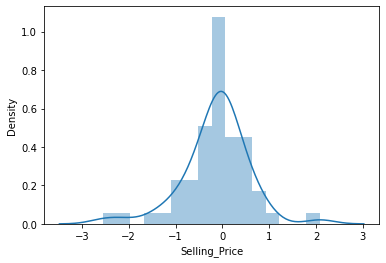

In [52]:
sns.distplot(y_test-predictions)

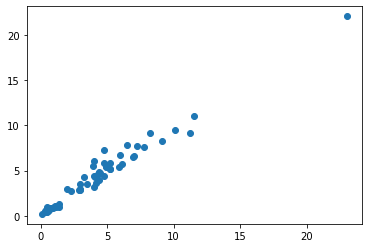

In [53]:
plt.scatter(y_test,predictions)

In [58]:
import pickle
# open a file, where you want to store the data
file = open('random_forest_regression_model.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)